In [1]:
import os
import sys
sys.path.append("./..")
from utils import PROJECT_ROOT
from definitions import get_cell_color
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


In [2]:
patient_id = 2
image_id = 70

In [3]:
cells_ = pd.read_csv(
    os.path.join(PROJECT_ROOT, "Input", "Single-cell", "Danenberg",
    "patient_{}_image_{}.csv".format(patient_id, image_id))
)
Adj = np.load(
    os.path.join(PROJECT_ROOT, "Output", "a_Cellular_graph", "Danenberg", "Cohort_1",
    "patient_{}_image_{}".format(patient_id, image_id),
    "Adj.npy")
)
print(f"{len(cells_)} cells in image {image_id} of patient {patient_id}")


2115 cells in image 70 of patient 2


In [4]:
def get_pos(G):
    x = nx.get_node_attributes(G, "X")
    y = nx.get_node_attributes(G, "Y")
    pos = {}
    for key, _ in x.items():
        pos[key] = (x[key], y[key])
    return pos

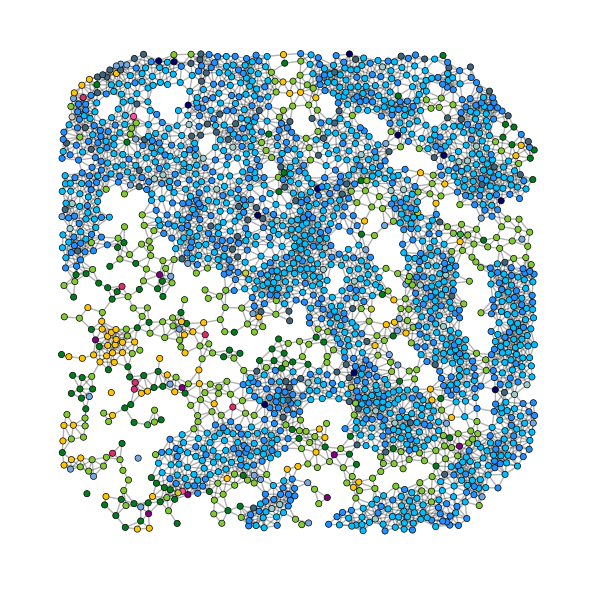

In [5]:
Adj[Adj < 0.01] = 0
np.fill_diagonal(Adj, 0)
G = nx.from_numpy_array(Adj)
nx.set_node_attributes(G, cells_["X"], "X")
nx.set_node_attributes(G, cells_["Y"], "Y")
nx.set_node_attributes(G, cells_["cell_type"], "cell_type")
f, ax = plt.subplots(
        1,
        1,
        figsize=(6, 6),
        tight_layout=True,
    )
cell_color_dict = get_cell_color('Danenberg')
nx.draw_networkx_nodes(
        G,
        get_pos(G),
        node_size=20,
        node_color=[cell_color_dict[cell_type] for cell_type in list(nx.get_node_attributes(G, "cell_type").values())],
        edgecolors="black",
        linewidths=0.5,
        ax=ax,
    )
nx.draw_networkx_edges(G, get_pos(G), ax=ax, alpha=0.3, width = 1)
ax.set(
        xlim=(
            (max(cells_["X"]) - min(cells_["X"])) / 2
            - 350 ,
            (max(cells_["X"]) - min(cells_["X"])) / 2
            + 350,
        ),
        ylim=(
            (max(cells_["Y"]) - min(cells_["Y"])) / 2
            - 350 ,
            (max(cells_["Y"]) - min(cells_["Y"])) / 2
            + 350,
        ),
    )
ax.set_axis_off()
